In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load data

df = pd.read_table("OilStockUSA.dat", sep='\s+', header = None)

In [3]:
series = df.iloc[:, 0] / 1000 
series.index = pd.date_range(start = '1990-01', periods = len(series), freq = 'MS')
series

1990-01-01    1.629687
1990-02-01    1.634646
1990-03-01    1.641913
1990-04-01    1.640188
1990-05-01    1.671526
                ...   
2019-08-01    1.945503
2019-09-01    1.943205
2019-10-01    1.926722
2019-11-01    1.918205
2019-12-01    1.916847
Freq: MS, Name: 0, Length: 360, dtype: float64

### Time Series Plot

(Text(0.5, 1.0, 'US Oil Stock'),
 Text(0.5, 0, 'Time'),
 Text(0, 0.5, 'Billion barrels'),
 None)

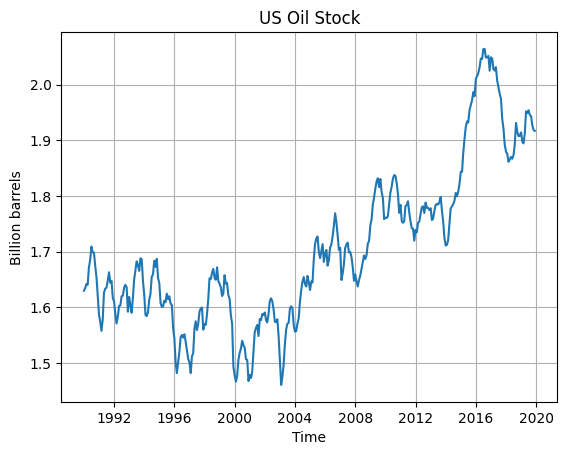

In [4]:
plt.plot(series)
plt.title('US Oil Stock'), plt.xlabel('Time'), plt.ylabel('Billion barrels'), plt.grid()

In [5]:
matrix = series.to_numpy().reshape(30, 12) # Rows are years, columns are months

### Mean-Variance Plot

In [6]:
EX = np.mean(matrix, axis = 1)

EX2 = np.square(EX) # Element-wise square
E2X = np.mean(np.square(matrix), axis = 1)

varX = E2X - EX2

In [7]:
from sklearn.linear_model import LinearRegression

data_x = EX.reshape(-1, 1)
range_x = np.arange(1.4, 2.1, 0.01).reshape(-1, 1)

reg = LinearRegression().fit(data_x, varX)

predictions = reg.predict(range_x)

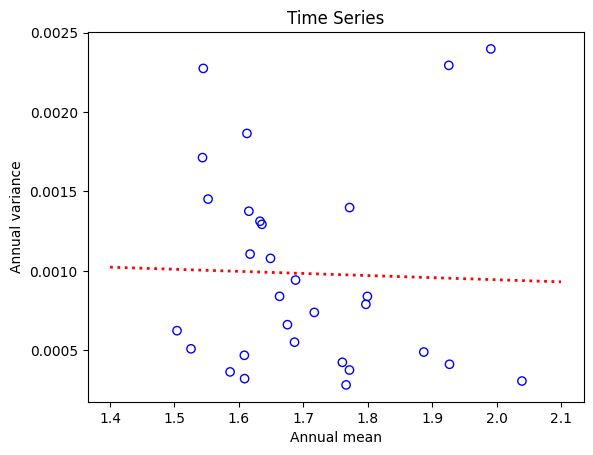

In [8]:
plt.scatter(EX, varX, facecolors='none', edgecolors='b')
plt.plot(range_x, predictions, color='red', linestyle=':', linewidth=2)
plt.title('Time Series'), plt.xlabel('Annual mean'), plt.ylabel('Annual variance')

plt.show()

# Small slope indicates constant variance

### Boxplot

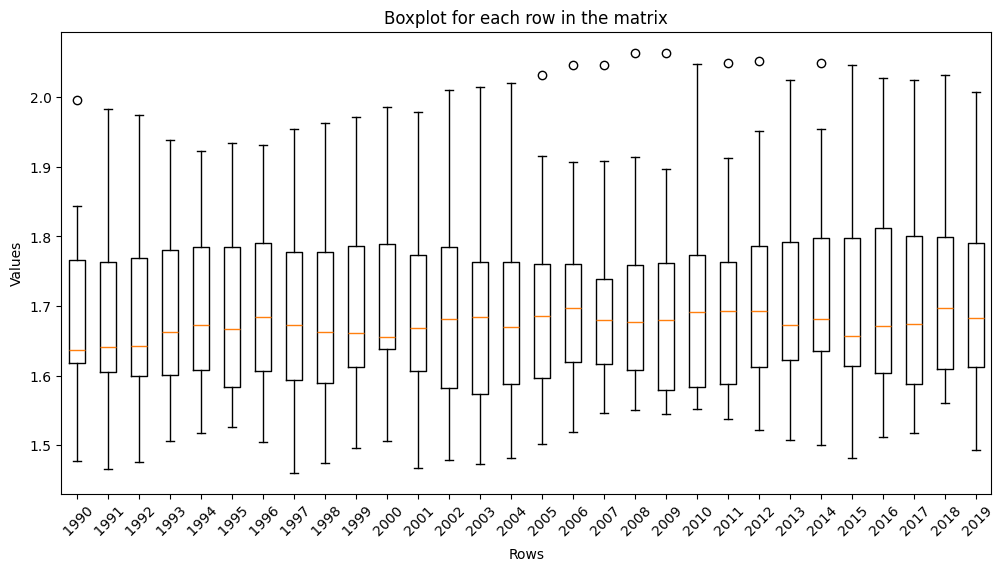

In [9]:
plt.figure(figsize=(12, 6))

plt.boxplot(matrix.reshape(12, 30))

# Labels and title
plt.xlabel('Rows')
plt.ylabel('Values')
plt.title('Boxplot for each row in the matrix')
plt.xticks(ticks=range(1, 31), labels=[f' {i+1990}' for i in range(30)], rotation=45)

plt.show()

# Showcases very similar variances overall

### Log plot of the time series

(Text(0.5, 1.0, 'US Oil Stock'),
 Text(0.5, 0, 'Time'),
 Text(0, 0.5, 'Log Billion barrels'),
 None)

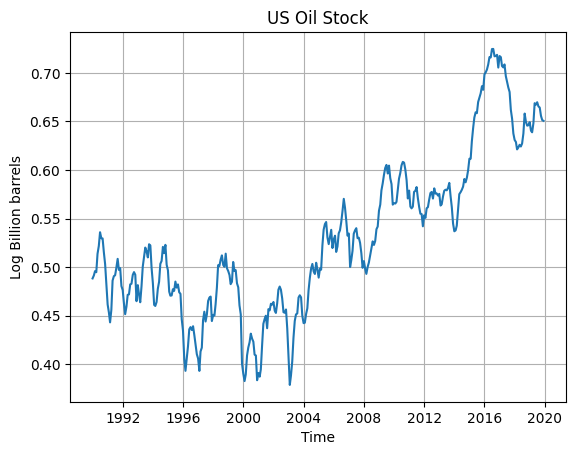

In [10]:
plt.plot(np.log(series))
plt.title('US Oil Stock'), plt.xlabel('Time'), plt.ylabel('Log Billion barrels'), plt.grid()
# The log transformation does not result in a considerable change w.r.t. the original TS -> we consider the variance constant

## Additive decomposition of the time series

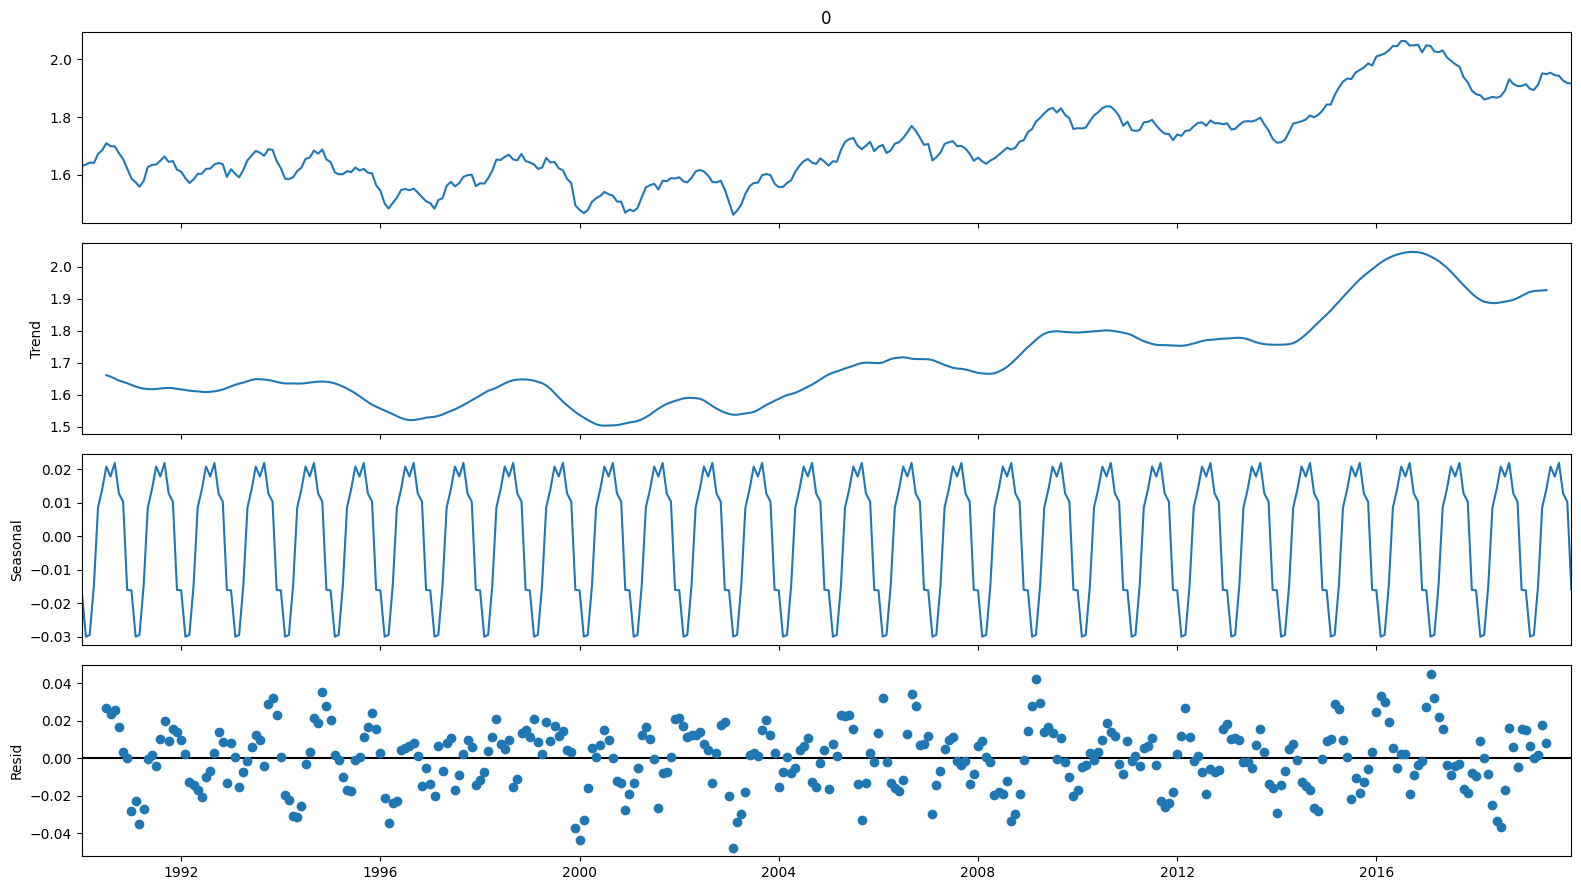

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
plot2 = seasonal_decompose(series, model = 'additive', period = 12) 
# Additive model: Y(t) = T(t) + S(t) + e(t) Trend + Seasonal + noise
# Multiplicative model: Y(t) = T(t) * S(t) * e(t) 

fig = plot2.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()
plt.show()

### Monthplot

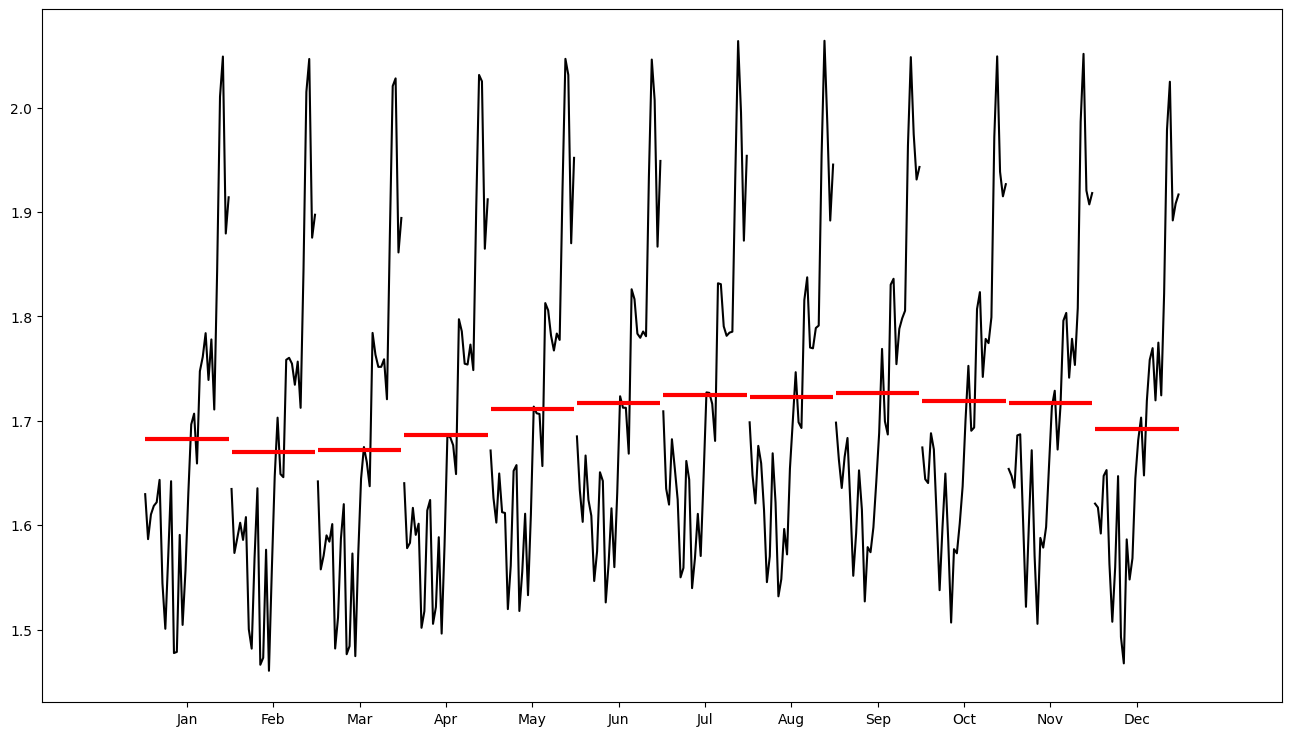

In [12]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
fig = month_plot(series)
fig.set_size_inches((16, 9))

In [13]:
d1series = series.diff(1) # One regular difference
d12series = series.diff(12) # One seasonal difference
d1d12series = d12series.diff(1) # One seasonal and one regular difference

print('Variance series: ', np.var(series))
print('Variance d12series: ', np.var(d12series)) # can be considered stationary
print('Variance d1series: ', np.var(d1series))
print('Variance d1d12series: ', np.var(d1d12series)) # can be considered stationary

print('Mean series: ', np.mean(series))
print('Mean d12series: ', np.mean(d12series)) # can be considered stationary
print('Mean d1series: ', np.mean(d1series))
print('Mean d1d12series: ', np.mean(d1d12series)) # can be considered stationary

Variance series:  0.0202874289456824
Variance d12series:  0.005150251250853317
Variance d1series:  0.0003495397029792288
Variance d1d12series:  0.0003959885874199771
Mean series:  1.7034604694444444
Mean d12series:  0.009096821839080458
Mean d1series:  0.0007998885793871869
Mean d1d12series:  0.00014949279538904828


Mean =  0.009096821839080458


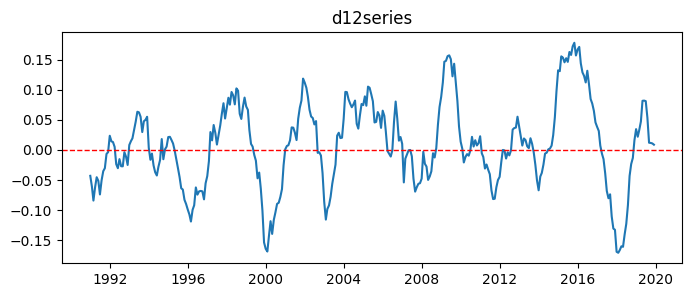

In [14]:
plt.figure(figsize = (8, 3))
plt.plot(d12series)
plt.title('d12series')
plt.axhline(0, color = 'red', linestyle = '--', linewidth = 1)
print("Mean = ", np.mean(d12series))

Mean =  0.0007998885793871869


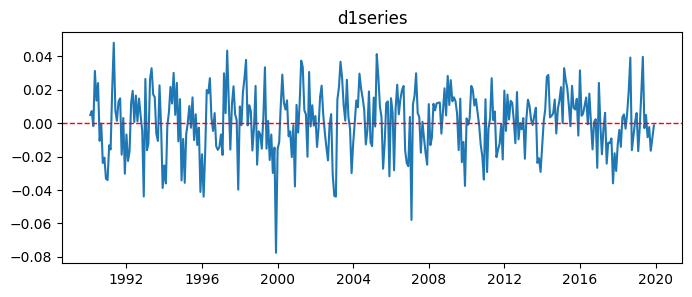

In [15]:
plt.figure(figsize = (8, 3))
plt.plot(d1series)
plt.title('d1series')
plt.axhline(0, color = 'red', linestyle = '--', linewidth = 1)
print("Mean = ", np.mean(d1series))

Mean =  0.0007998885793871869


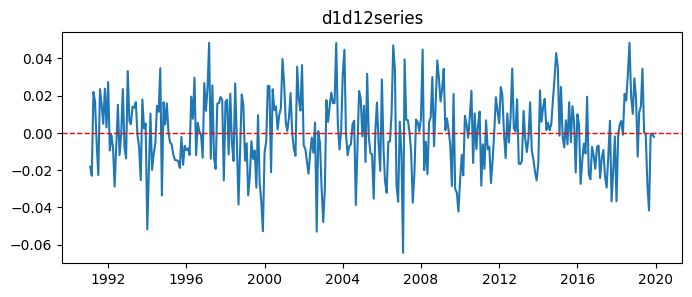

In [16]:
plt.figure(figsize = (8, 3))
plt.plot(d1d12series)
plt.title('d1d12series')
plt.axhline(0, color = 'red', linestyle = '--', linewidth = 1)
print("Mean = ", np.mean(d1series))

## ACF and PACF d12series

In [17]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [18]:
import matplotlib
import matplotlib.collections as LineCollection
from matplotlib import colors
import matplotlib.collections as collections

In [19]:
def plot_acf_pacf(time_series):
    fig, axes = plt.subplots(2, 1, figsize=(6, 9))

    # Plot ACF
    acf_result = plot_acf(time_series.dropna(), ax=axes[0], lags=72, color='blue', linewidth=1, markersize=0)
    customize_plot(axes[0])
    axes[0].axhline(y=0.1, color='gray', linestyle='--')
    axes[0].axhline(y=-0.1, color='gray', linestyle='--')
    axes[0].set_title('Autocorrelation Function (ACF) - (MA)')

    # Plot PACF
    pacf_result = plot_pacf(time_series.dropna(), ax=axes[1], lags=72, color='blue', linewidth=1, markersize=0)
    customize_plot(axes[1])
    axes[1].axhline(y=0.1, color='gray', linestyle='--')
    axes[1].axhline(y=-0.1, color='gray', linestyle='--')
    axes[1].set_title('Partial Autocorrelation Function (PACF) - (AR)')

    plt.tight_layout()
    plt.show()

def customize_plot(ax):
    for item in ax.collections:
        if isinstance(item, matplotlib.collections.LineCollection): 
            segments = item.get_segments()
            for i in range(len(segments)):
                # Update segment every 12th iteration
                if (i + 1) % 12 == 0:
                    segments[i] = [[segments[i][0][0], segments[i][0][1]], [segments[i][1][0], segments[i][1][1]]]

            # Set color based on multiple conditions
            colors = []
            for j in range(len(segments)):
                if j == 0 or (j) % 12 == 0:
                    colors.append('red')
                else:
                    colors.append('blue')
            item.set_edgecolor(colors)

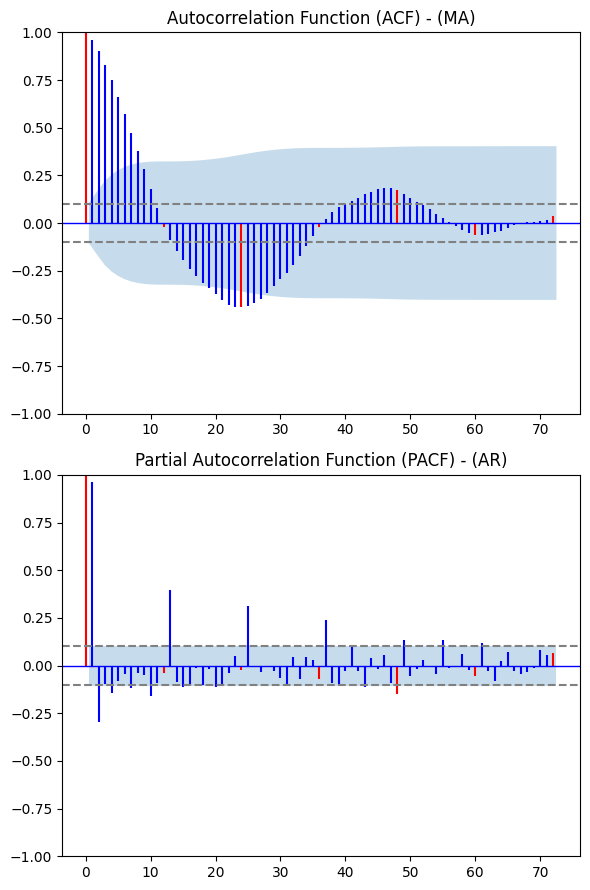

In [20]:
plot_acf_pacf(d12series)

In [21]:
# We test several models and chose the best by AIC criterion

In [22]:
import pmdarima as pm
from pmdarima import auto_arima

model = auto_arima(series, max_p = 4, max_d = 1, max_q = 2, max_P = 1, max_D = 1, max_Q = 4,
                   max_order = 20, # p + q + P + Q
                   information_criterion = 'aic',
                   seasonal=True,  # Consider seasonal components
                   m=12,           # Seasonality period (e.g., 12 for monthly data)
                   trace=True,      # Print model fitting progress
                   error_action='ignore',  
                   suppress_warnings=True,  
                   stepwise=False)   # Stepwise approach to find the best model

 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-1834.445, Time=0.04 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=-1883.779, Time=0.20 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=-1892.725, Time=0.64 sec
 ARIMA(0,1,0)(0,0,3)[12] intercept   : AIC=-1901.934, Time=1.67 sec
 ARIMA(0,1,0)(0,0,4)[12] intercept   : AIC=-1926.319, Time=3.53 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=-1905.081, Time=0.08 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=-1987.050, Time=0.63 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=-1983.937, Time=0.80 sec
 ARIMA(0,1,0)(1,0,3)[12] intercept   : AIC=-1988.379, Time=1.51 sec
 ARIMA(0,1,0)(1,0,4)[12] intercept   : AIC=-1971.809, Time=3.26 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=-1854.070, Time=0.08 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-1903.744, Time=0.22 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=-1915.076, Time=0.78 sec
 ARIMA(0,1,1)(0,0,3)[12] intercept   : AIC=-1921.599, Time=1.36 sec
 ARIMA(0,1,1)(0,0,4)[12] intercept   : AIC=-1940

In [23]:
model1 = pm.ARIMA(order = (2, 1, 0), seasonal_order = (1, 0, 1, 12))
model1.fit(series)
print(model1.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  360
Model:             SARIMAX(2, 1, 0)x(1, 0, [1], 12)   Log Likelihood                1010.733
Date:                              Thu, 13 Mar 2025   AIC                          -2009.467
Time:                                      21:12:15   BIC                          -1986.167
Sample:                                  01-01-1990   HQIC                         -2000.201
                                       - 12-01-2019                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.289e-05   5.08e-05      0.254      0.800   -8.66e-05       0.000
ar.L1          0.25

C:\Users\Roger\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [24]:
# Less than 2 -> not significant.
significance_levels = abs(model1.params()/model1.bse())
significance_levels # Lowest significant level is for the intercept, we remove it.

intercept     0.253849
ar.L1         4.490952
ar.L2         1.524188
ar.S.L12     84.710879
ma.S.L12     18.880113
sigma2       13.184855
dtype: float64

In [25]:
model1 = pm.ARIMA(order = (2, 1, 0), seasonal_order = (1, 0, 1, 12), trend = 'n') # Trend = 'n' -> no intercepts
 # aic = -2011.253
model1.fit(series)
print(model1.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  360
Model:             SARIMAX(2, 1, 0)x(1, 0, [1], 12)   Log Likelihood                1010.627
Date:                              Thu, 13 Mar 2025   AIC                          -2011.253
Time:                                      21:12:15   BIC                          -1991.836
Sample:                                  01-01-1990   HQIC                         -2003.532
                                       - 12-01-2019                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2781      0.056      4.961      0.000       0.168       0.388
ar.L2          0.06

C:\Users\Roger\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [26]:
significance_levels = abs(model1.params()/model1.bse()) # We could remove the ar.L2 parameter as it is not significant enough
significance_levels

ar.L1        4.960519
ar.L2        1.232037
ar.S.L12    93.942088
ma.S.L12    20.677420
sigma2      13.197296
dtype: float64

In [27]:
# Because the term that is non significant is the second AR term we can just remove it. If not we would have to use
# statsmodels.ARIMAX to remove it...

model1 = pm.ARIMA(order = (1, 1, 0), seasonal_order = (1, 0, 1, 12), trend = 'n') # Trend = 'n' -> no intercepts
 # aic = -2012.886
model1.fit(series)
print(model1.summary())            

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  360
Model:             SARIMAX(1, 1, 0)x(1, 0, [1], 12)   Log Likelihood                1010.443
Date:                              Thu, 13 Mar 2025   AIC                          -2012.886
Time:                                      21:12:15   BIC                          -1997.353
Sample:                                  01-01-1990   HQIC                         -2006.709
                                       - 12-01-2019                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2662      0.053      5.052      0.000       0.163       0.370
ar.S.L12       0.99

C:\Users\Roger\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [28]:
# All parameters are now significant
significance_levels = abs(model1.params()/model1.bse()) # We could remove the ar.L2 parameter as it is not significant enough
significance_levels

ar.L1         5.051580
ar.S.L12    190.241043
ma.S.L12     24.142335
sigma2       13.410014
dtype: float64

The general non-stationary seasonal $ARIMA(p, d, q)(P, D, Q)_s$ is:

$$(1- \phi_1B - \dots - \phi_pB^p) (1- \Phi_1 B^s  \dots - \Phi_P B^{s, P})(1-B)^d (1-B^s)^D X_t = (1 + \theta_1 B + \dots + \theta_q B^q)(1 + \Theta_1 B^s + \dots + \Theta_Q B^{s, Q}) Z_t$$

We have identified the following model

ARIMA(2,1,0)(1,0,1)[12] 


$$(1- \phi_1B  - \phi_2 B^2) (1- \Phi_1 B^{12})(1-B) X_t = (1 + \Theta_1 B^{12}) Z_t$$

We have estimated the following model


$$\boxed{(1- 5.05 B) (1- 190.24 B^{12})(1-B) X_t = (1 + 24.14 B^{12}) Z_t}$$


## Validation of the model

The premises we want to see satisfied for the residual analysis of $Z_t$ are:

- Homogeneity of variance i.e. $\sigma_z^2$ constant
- Normality i.e. $Z_t \sim Normal$
- Independence i.e. $\rho(k) = 0 \quad \forall k$

In [29]:
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import norm
from scipy.interpolate import UnivariateSpline
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.stattools import jarque_bera
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan

In [30]:
def validation1(model, data):
    s = 12  # Assuming a seasonal frequency of 12, like in R's `frequency`
    
    # Get the residuals from the model
    resid = model.resid().tail(-1)  # This should already be a pandas Series or numpy array
    
    # Create the 2x2 grid of subplots
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))

    # Residuals plot
    axs[0, 0].plot(resid)
    axs[0, 0].set_title("Residuals")
    axs[0, 0].axhline(0, color='black', linewidth=1)
    axs[0, 0].axhline(3 * np.std(resid), linestyle='--', color='blue')
    axs[0, 0].axhline(-3 * np.std(resid), linestyle='--', color='blue')

    # Square root of absolute residuals (Homoscedasticity)
    # Square root of absolute residuals (Homoscedasticity)
    axs[0, 1].scatter(range(len(resid)), np.sqrt(np.abs(resid)), color='black', alpha=0.5)
    axs[0, 1].set_title("Square Root of Absolute Residuals")
    
    # Fit a smoothing spline to the data
    x = np.arange(len(resid))
    y = np.sqrt(np.abs(resid))
    spline = UnivariateSpline(x, y, s=1)  # 's' controls the smoothness (higher = smoother)
    
    # Overlay the smooth curve
    axs[0, 1].plot(x, spline(x), color='red', linewidth=2)

    
    # QQ plot to check for normality of residuals
    qqplot(resid, line='s', ax=axs[1, 0])
    axs[1, 0].set_title("QQ Plot")

    # Histogram of residuals
    mu, std = norm.fit(resid)  # Fit a normal distribution to the residuals
    axs[1, 1].hist(resid, bins=30, edgecolor='k', alpha=0.7)
    axs[1, 1].set_title("Histogram of Residuals")
    
    # Overlay the normal distribution fit on the histogram
    xmin, xmax = axs[1, 1].get_xlim()  # Get the limits of the x-axis for proper plotting
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)  # Compute the normal pdf
    axs[1, 1].plot(x, p, 'k', linewidth=2)  # Plot the normal distribution curve

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()


def acf_pacf_resid(model, data):
    resid = model.resid().tail(-1)
    print('Residuals ACF / PACF')
    plot_acf_pacf(resid)
    resid2 = resid**2
    print('Residuals^2 ACF / PACF')
    plot_acf_pacf(resid2)


def ljung_box_test_independece_resid(model, lags):
    resid = model.resid().tail(-1)  # This should already be a pandas Series or numpy array

    fig, axs = plt.subplots(3, 1, figsize=(8, 8))

    # Residuals plot
    axs[0].plot(resid)
    axs[0].axhline(0, color='black', linewidth=1)
    axs[0].set_title("Residuals")

    # ACF (Autocorrelation) plot of residuals
    plot_acf(resid, lags=72, ax=axs[1], markersize = 0)
    axs[1].set_title("ACF of Residuals")

    # Ljung-Box test for independence of residuals
    try:
        lb_test = acorr_ljungbox(resid, lags=72, return_df=True)
        print(lb_test)  # Debug output
    
        # Plot hollow circles for p-values
        axs[2].scatter(lb_test.index, lb_test['lb_pvalue'], facecolors='none', edgecolors='blue')
    
        # Add a significance threshold line
        axs[2].axhline(0.05, linestyle='--', color='red')
    
        # Tidy up the x-axis to show every 10 lags
        axs[2].set_xticks(lb_test.index[9::10])
    
        # Labels and title
        axs[2].set_xlabel("Lag")
        axs[2].set_ylabel("p-value")
        axs[2].set_title("Ljung-Box Test p-values")
    
    except Exception as e:
        print(f"Error in Ljung-Box test: {e}")

    plt.tight_layout()
    plt.show()



def stationary_causal_invertible_validation(model):
    # Get AR and MA roots
    ar_roots = model.arroots()
    ma_roots = model.maroots()
    
    # Create plots
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    
    # Inverse AR roots plot
    axes[0].scatter(ar_roots.real, ar_roots.imag)
    circle = plt.Circle((0, 0), 1, color='gray', fill=False)
    axes[0].add_patch(circle)
    axes[0].axhline(0, color='gray', linestyle='--'), axes[0].axvline(0, color='gray', linestyle='--')
    axes[0].set_title('Inverse AR roots'), axes[0].set_xlabel('Real'), axes[0].set_ylabel('Imaginary')
    # axes[0].set_xlim(-1.5, 1.5), axes[0].set_ylim(-1.5, 1.5)
    
    # Inverse MA roots plot
    axes[1].scatter(ma_roots.real, ma_roots.imag)
    circle = plt.Circle((0, 0), 1, color='gray', fill=False)
    axes[1].add_patch(circle)
    axes[1].axhline(0, color='gray', linestyle='--'), axes[1].axvline(0, color='gray', linestyle='--')
    axes[1].set_title('Inverse MA roots'), axes[1].set_xlabel('Real'), axes[1].set_ylabel('Imaginary')
    # axes[1].set_xlim(-1.5, 1.5), axes[1].set_ylim(-1.5, 1.5)

    print('AR roots: '),     print('')
    for elem in ar_roots:
        if abs(elem) <= 1:
            print('The following AR ROOT lies inside the unit circle in the complex plane indicating that the model may not be stationary/causal and invertible.')
        print(abs(elem))
        
    print(''), print('MA roots: '), print('')        
    for elem in ma_roots:
        if abs(elem) <= 1:
            print('The following MA ROOT lies inside the unit circle in the complex plane indicating that the model may not be stationary/causal and invertible.')
        print(abs(elem))
    
    plt.tight_layout()
    plt.show()


def normality_validation(model):
    import scipy.stats as stats

    # Normality tests
    
    # Get residuals
    residuals = model.resid().tail(-1)
    
    # Shapiro-Wilk test
    # We want the statistic to go close to 1 and a p-value larger than 0.05
    shapiro_test = stats.shapiro(residuals)
    print("\nShapiro-Wilk Test:")
    print(f"Statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")
    
    # Anderson-Darling test
    # We want the statistic to go close to 0 and a p-value larger than 0.05
    anderson_test = stats.anderson(residuals, dist='norm')
    print("\nAnderson-Darling Test:")
    print(f"Statistic: {anderson_test.statistic}")
    for i in range(len(anderson_test.critical_values)):
        sig_lvl = anderson_test.significance_level[i]
        crit_val = anderson_test.critical_values[i]
        print(f"At {sig_lvl}% significance level: Critical value = {crit_val}")
    
    # Jarque-Bera test
    # We want a p-value larger than 0.05
    jb_test = jarque_bera(residuals)
    print("\nJarque-Bera Test:")
    print(f"Statistic: {jb_test[0]}, p-value: {jb_test[1]}")



def validation10(series, model):
    residuals = model1.resid().tail(-1)
    # Homoscedasticity Test (Breusch-Pagan)
    print("\nHomoscedasticity Test\n--------------------")
    exog = sm.add_constant(series.tail(-1)  - residuals)
    bp_test = het_breuschpagan(residuals, exog)
    print(f"Lagrange Multiplier Statistic: {bp_test[0]}, p-value: {bp_test[1]}")
    print(f"F-statistic: {bp_test[2]}, F-test p-value: {bp_test[3]}")
    

    
    # Compute the Durbin-Watson statistic
    dw_stat = durbin_watson(residuals)
    print(f"Durbin-Watson statistic: {dw_stat}")
    # DW = 2 No autocorrelation (goal)
    # DW < 2 Positive autocorrelation
    # DW > 2 Negative autocorrelation
    

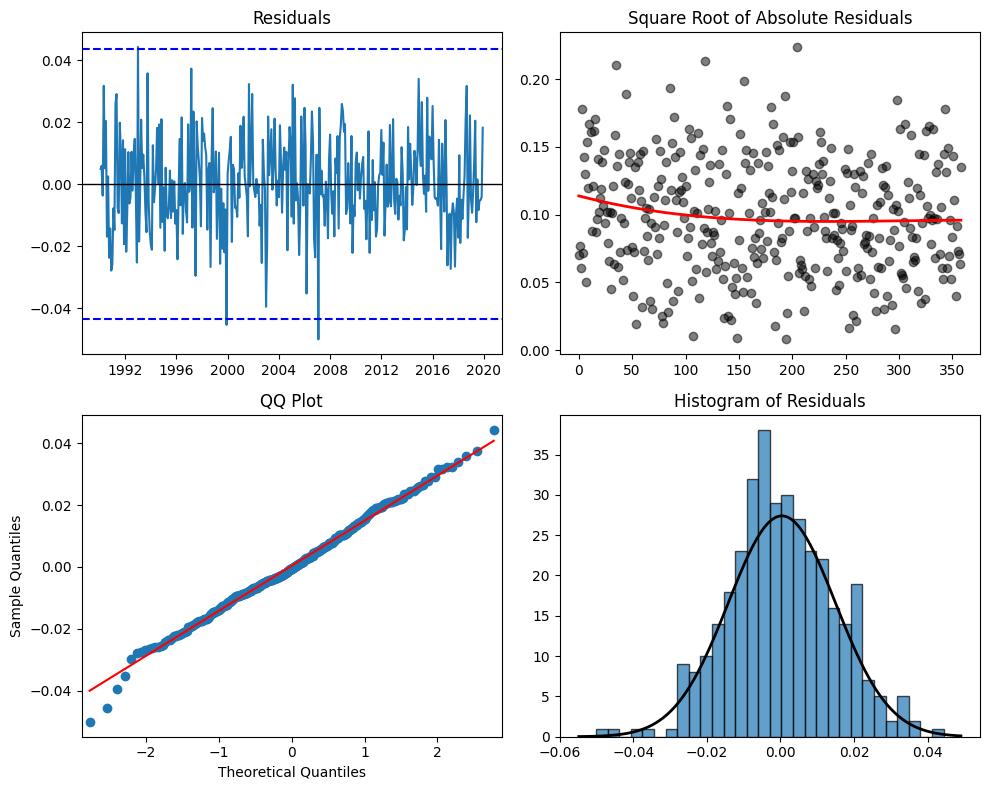

Residuals ACF / PACF


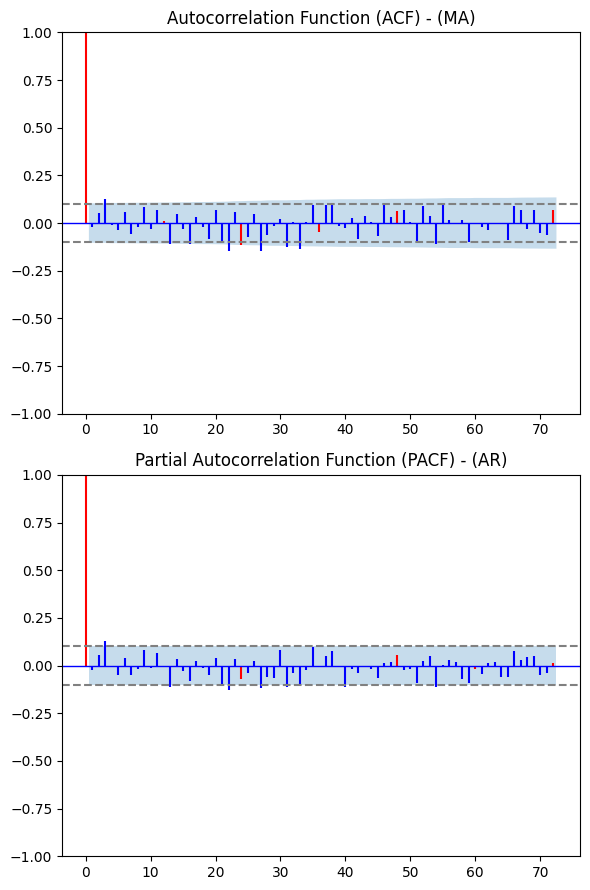

Residuals^2 ACF / PACF


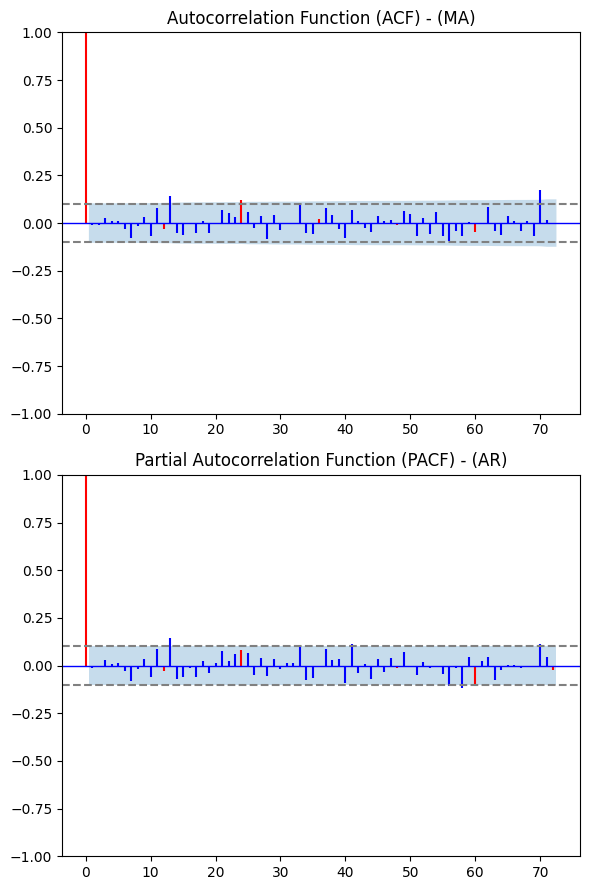

       lb_stat  lb_pvalue
1     0.161403   0.687868
2     1.204250   0.547647
3     6.988916   0.072252
4     7.015013   0.135097
5     7.436243   0.190165
..         ...        ...
68  133.018290   0.000004
69  135.199927   0.000003
70  136.351715   0.000004
71  138.084044   0.000003
72  140.313767   0.000003

[72 rows x 2 columns]


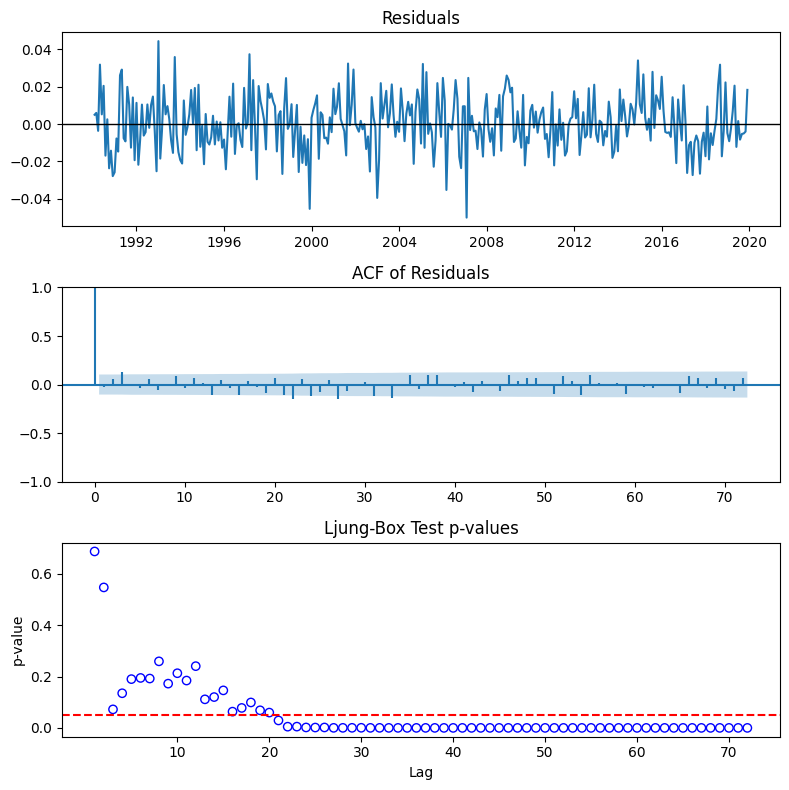

AR roots: 

1.000549956623801
1.0005499566238008
1.0005499566238008
1.0005499566238008
1.0005499566238008
1.0005499566238014
1.0005499566238014
1.000549956623803
1.000549956623803
1.0005499566238019
1.0005499566238019
1.0005499566238019
3.7559848371583806

MA roots: 

1.008393311612977
1.0083933116129777
1.0083933116129777
1.0083933116129782
1.0083933116129782
1.0083933116129784
1.0083933116129784
1.0083933116129782
1.0083933116129782
1.0083933116129786
1.0083933116129777
1.0083933116129777


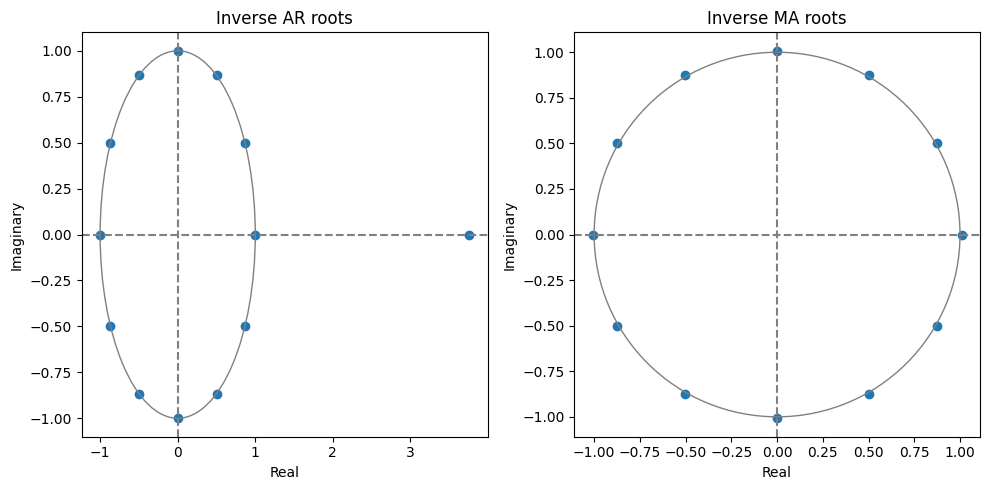


Shapiro-Wilk Test:
Statistic: 0.9959456421464574, p-value: 0.48750541641561196

Anderson-Darling Test:
Statistic: 0.43352312915021685
At 15.0% significance level: Critical value = 0.57
At 10.0% significance level: Critical value = 0.649
At 5.0% significance level: Critical value = 0.778
At 2.5% significance level: Critical value = 0.908
At 1.0% significance level: Critical value = 1.08

Jarque-Bera Test:
Statistic: 0.6042663982526972, p-value: 0.7392395922635917

Homoscedasticity Test
--------------------
Lagrange Multiplier Statistic: 2.8567777357733033, p-value: 0.09098960245083311
F-statistic: 2.863650317945447, F-test p-value: 0.09147420659396323
Durbin-Watson statistic: 2.0362782471632137


In [31]:
validation1(model1, series)
acf_pacf_resid(model1, series)
ljung_box_test_independece_resid(model1, 72)
stationary_causal_invertible_validation(model1)
normality_validation(model1)
validation10(series, model1)